In [1]:
import numpy as np
from matplotlib import pyplot as pl

import scipy.io.wavfile as wav
from scikits.talkbox.features import mfcc

%matplotlib inline

import os
BASE_DIR = 'vowels/'
files = os.listdir(BASE_DIR)

# 7.1

In [2]:
nafFiles = []
namFiles = []

# Get all natural female and male wav files by itering all the files' names.
# The first value of each array's elements is the simple rate, while the second one is the values.
for f in files:
    if f.startswith("naf"):
        nafFiles.append(wav.read(BASE_DIR + f))
    if f.startswith("nam"):
        namFiles.append(wav.read(BASE_DIR + f))

In [3]:
nafCeps = []
for f in nafFiles:
    nafCeps.append(mfcc(f[1], fs=f[0])[0])

namCeps = []
for f in namFiles:
    namCeps.append(mfcc(f[1], fs=f[0])[0])

In [4]:
nafMeanCeps = []
for c in nafCeps:
    nafMeanCeps.append(np.mean(c, axis=0))

In [5]:
namMeanCeps = []
for c in namCeps:
    namMeanCeps.append(np.mean(c, axis=0))
print namMeanCeps[0]

[  1.52453419e+01   1.39559921e+00  -7.96407272e-01  -2.68892312e-01
  -6.20846343e-01  -1.54036023e-01  -1.81513987e-01  -9.56934275e-01
   3.09275282e-01   6.67118174e-01   5.45880815e-03  -6.38553334e-02
   2.30225873e-01]


In [212]:
dsf = np.array(map(lambda x: np.append(x, 1), nafMeanCeps))
dsm = np.array(map(lambda x: np.append(x, -1), namMeanCeps))
dataset = np.append(dsf, dsm, axis=0)
print dataset

[[ 14.51927926   2.86848082  -0.15321305 ...,  -0.0326818    0.25278123
    1.        ]
 [ 15.18136055   0.54350424   1.04578408 ...,  -0.25348565   0.12283921
    1.        ]
 [ 15.00935594   2.44551823  -1.00368672 ...,  -0.17323347   0.07124727
    1.        ]
 ..., 
 [ 13.00825573   2.62581433   0.50180508 ...,  -0.53434107   0.22507857
   -1.        ]
 [ 14.08622517  -0.03963486  -0.29586425 ...,  -0.31532672   0.16649056
   -1.        ]
 [ 14.06554018   2.96204057  -0.28398036 ...,   0.20566218   0.26698572
   -1.        ]]


In [213]:
import mlp_backprop_momentum as mlp
reload(mlp)
import k_fold_cross_validation as cv
reload(cv)

<module 'k_fold_cross_validation' from 'k_fold_cross_validation.pyc'>

In [214]:
N_INITS = 10
EPOCHS = 100
N_NEURONS = [2, 4, 8, 16, 32]
LEARNING_RATE = 0.001
MOMENTUM = 0.5

In [215]:
MSE = np.zeros((len(N_NEURONS), N_INITS, EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
    print 'Testing', h, 'neurons...'
    nn = mlp.MLP([13,h,2], 'tanh')
    for i in np.arange(N_INITS):                                        # looping the initializations
        nn.init_weights()
        
        MSE[i_h, i, :] = nn.fit((dataset[:,0:13], dataset[:,13:15]),
                                learning_rate=LEARNING_RATE,
                                momentum=MOMENTUM,
                                epochs=EPOCHS)

Testing 2 neurons...
Testing 4 neurons...
Testing 8 neurons...
Testing 16 neurons...
Testing 32 neurons...


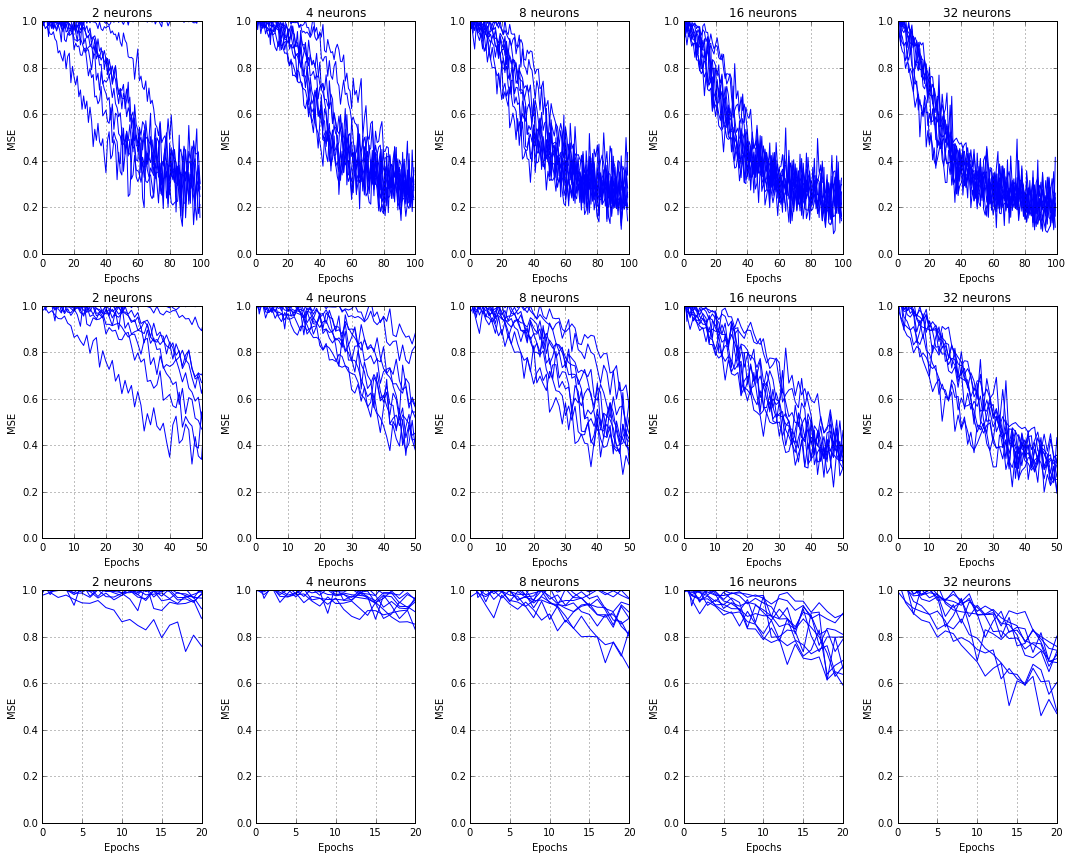

In [216]:
pl.figure(figsize=(15,12))
p_count = 0
for lim in [100, 50, 20]:
    for n in np.arange(MSE.shape[0]):
        p_count += 1
        pl.subplot(3,MSE.shape[0], p_count)
        for i in np.arange(MSE.shape[1]):
            pl.plot(MSE[n,i,:], c='b')
        pl.ylim(0,1)
        pl.xlim(0,lim)
        pl.xlabel('Epochs')
        pl.ylabel('MSE')
        pl.title(str(N_NEURONS[n]) + ' neurons')
        pl.grid()
pl.tight_layout()

## Exploring the number of hidden neurons

In [217]:
EPOCHS = [20, 50, 100]
K = 5
N_TESTS = 10
N_NEURONS = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]

In [219]:
MSE_train = np.zeros((len(N_NEURONS), len(EPOCHS), N_TESTS))
MSE_test = np.zeros((len(N_NEURONS), len(EPOCHS), N_TESTS))

for i_e, e in enumerate(EPOCHS):                                            # looping the number of epochs
    print 'Testing with', e, 'epochs...'
    for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
        print '\tTesting', h, 'neurons...'
        nn = mlp.MLP([13,h,1], 'tanh')
        for i in np.arange(N_TESTS):                                        # looping the tests
            temp1, temp2 = cv.k_fold_cross_validation(nn,
                                                      dataset,
                                                      k=K,
                                                      learning_rate=LEARNING_RATE,
                                                      momentum=MOMENTUM,
                                                      epochs=e)
            MSE_train[i_h, i_e, i] = temp1
            MSE_test[i_h, i_e, i] = temp2

Testing with 20 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...
Testing with 50 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...
Testing with 100 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...


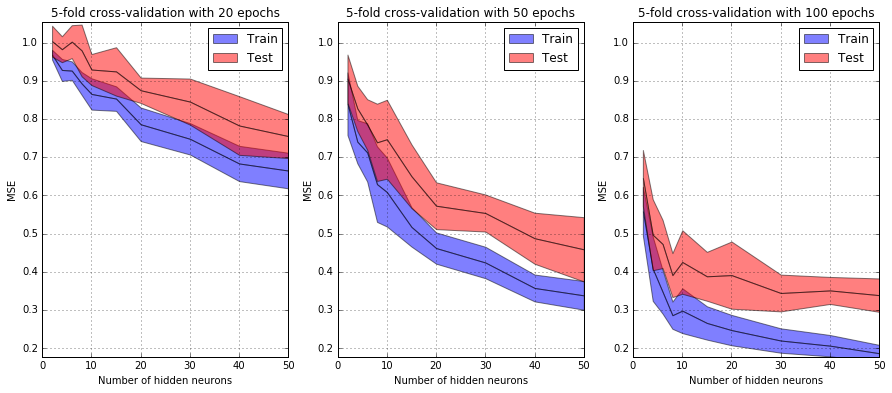

In [220]:
MSE_train_mean = np.mean(MSE_train, axis=2)
MSE_test_mean = np.mean(MSE_test, axis=2)
MSE_train_sd = np.std(MSE_train, axis=2)
MSE_test_sd = np.std(MSE_test, axis=2)

v_min = min(np.min(MSE_train_mean), np.min(MSE_test_mean))
v_max = max(np.max(MSE_train_mean), np.max(MSE_test_mean))

pl.figure(figsize=(15,6))
for i_e, e in enumerate(EPOCHS):
    pl.subplot(1,3,i_e+1)
    pl.fill_between(N_NEURONS, MSE_train_mean[:,i_e], MSE_train_mean[:,i_e]+MSE_train_sd[:,i_e], facecolor='blue', alpha=0.5, label='Train')
    pl.fill_between(N_NEURONS, MSE_train_mean[:,i_e], MSE_train_mean[:,i_e]-MSE_train_sd[:,i_e], facecolor='blue', alpha=0.5)
    pl.fill_between(N_NEURONS, MSE_test_mean[:,i_e], MSE_test_mean[:,i_e]+MSE_test_sd[:,i_e], facecolor='red', alpha=0.5, label='Test')
    pl.fill_between(N_NEURONS, MSE_test_mean[:,i_e], MSE_test_mean[:,i_e]-MSE_test_sd[:,i_e], facecolor='red', alpha=0.5)
    pl.ylim(0.95*v_min,1.05*v_max)
    pl.ylabel('MSE')
    pl.xlabel('Number of hidden neurons')
    pl.title(str(K)+'-fold cross-validation with '+str(e)+' epochs')
    pl.legend()
    pl.grid()

## Exploring the number of epochs and the number of hidden neurons at the same time

In [221]:
EPOCHS = 100

In [222]:
MSE_train = np.zeros((len(N_NEURONS), EPOCHS))
MSE_test = np.zeros((len(N_NEURONS), EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
    print '\tTesting', h, 'neurons...'
    nn = mlp.MLP([13,h,1], 'tanh')
    temp1, temp2 = cv.k_fold_cross_validation_per_epoch(nn,
                                                        dataset,
                                                        k=K,
                                                        learning_rate=LEARNING_RATE,
                                                        momentum=MOMENTUM,
                                                        epochs=EPOCHS)
    MSE_train[i_h, :] = temp1
    MSE_test[i_h, :] = temp2

	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...


In [223]:
min(np.min(MSE_train), np.min(MSE_test))

0.1488674754988985

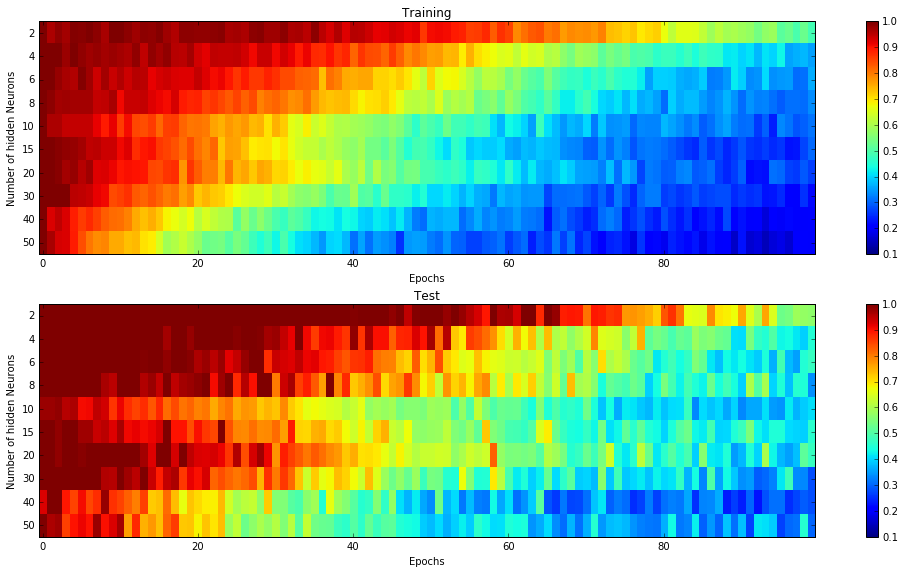

In [224]:
#v_min = min(np.min(MSE_train), np.min(MSE_test))
v_min = 0.1   # tune these values to enhance visualization
v_max = 1

pl.figure(figsize=(15,8))
pl.subplot(2,1,1)
pl.imshow(MSE_train, vmin=v_min, vmax=v_max, aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Training')
pl.colorbar()
pl.subplot(2,1,2)
pl.imshow(MSE_test, vmin=v_min, vmax=v_max, aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Test')
pl.colorbar()
pl.tight_layout()

## The final model

In [225]:
MSE_train, MSE_test, conf_mat = cv.k_fold_cross_validation(nn,
                                                          dataset,
                                                          k=K,
                                                          learning_rate=LEARNING_RATE,
                                                          momentum=MOMENTUM,
                                                          epochs=80,
                                                          threshold=0.0)

In [226]:
print 'MSE training: ', MSE_train
print 'MSE test: ', MSE_test
print 'Confusion matrix:'
print conf_mat

MSE training:  0.218589110337
MSE test:  0.279088142057
Confusion matrix:
[[ 33.   3.]
 [  2.  34.]]


# 7.2

In [6]:
nkFiles = []

for f in files:
    if f.startswith("nk"):
        nkFiles.append(wav.read(BASE_DIR + f))

In [7]:
nkCeps = []
for f in nkFiles:
    nkCeps.append(mfcc(f[1], fs=f[0])[0])

In [8]:
nkMeanCeps = []
for c in nkCeps:
    nkMeanCeps.append(np.mean(c, axis=0))

# 7.3

In [9]:
print nafMeanCeps

[array([  1.45192793e+01,   2.86848082e+00,  -1.53213049e-01,
         1.16295263e-02,  -3.03287454e-01,   8.62487242e-01,
        -4.85307386e-01,  -3.08289919e-01,  -4.49305723e-01,
         3.31617142e-01,   5.55751189e-02,  -3.26818008e-02,
         2.52781231e-01]), array([  1.51813605e+01,   5.43504237e-01,   1.04578408e+00,
         1.80867812e+00,  -8.01195231e-02,  -4.06602434e-01,
         2.80008987e-01,  -2.07164679e-01,  -4.11168060e-01,
         2.12127628e-03,   2.39941083e-02,  -2.53485648e-01,
         1.22839214e-01]), array([ 15.00935594,   2.44551823,  -1.00368672,   0.38907194,
         0.99366843,  -0.07768997,  -1.30984379,   0.30254197,
         0.27436856,  -0.60277613,   0.32611092,  -0.17323347,   0.07124727]), array([ 15.74054537,   1.90082248,  -0.3073282 ,   1.13234723,
        -0.23127706,   0.07724693,  -0.62257336,  -0.02111931,
        -0.02024555,   0.11724587,  -0.06437372,  -0.38428337,   0.38513391]), array([ 15.80234939,   2.04174719,  -0.3284331 

In [10]:
print namMeanCeps

[array([  1.52453419e+01,   1.39559921e+00,  -7.96407272e-01,
        -2.68892312e-01,  -6.20846343e-01,  -1.54036023e-01,
        -1.81513987e-01,  -9.56934275e-01,   3.09275282e-01,
         6.67118174e-01,   5.45880815e-03,  -6.38553334e-02,
         2.30225873e-01]), array([ 13.82053175,   0.18122537,  -0.44008225,   2.61338992,
         0.13729246,  -0.10152975,  -0.72572486,  -0.13483999,
         0.31970432,  -0.52157722,  -0.14419281,  -0.28232728,  -0.14751782]), array([ 14.96551974,   1.13466921,  -1.65145659,   0.6521779 ,
        -0.46551973,  -0.42701283,  -0.87350704,  -0.14682849,
         0.34416181,   0.22563101,   0.03821731,  -0.10469323,   0.46451105]), array([ 13.34248143,   3.1485004 ,  -1.14895366,   0.25759329,
         0.29183059,   1.78755304,  -1.01323835,  -0.92253951,
         0.33767597,  -0.48562173,  -0.06394629,  -0.4052421 ,  -0.09259382]), array([ 14.74710464,   2.06752802,  -1.30673668,   0.1233166 ,
        -1.35408721,   0.73435664,  -0.65883967,  

# 7.4

In [11]:
dsf = np.array(map(lambda x: np.append(x, 1), nafMeanCeps))
dsm = np.array(map(lambda x: np.append(x, -1), namMeanCeps))
dsk = np.array(map(lambda x: np.append(x, 0), nkMeanCeps))
dataset = np.append(dsf, dsm, axis=0)
dataset = np.append(dataset, dsk, axis=0)
print dataset

[[  1.45192793e+01   2.86848082e+00  -1.53213049e-01 ...,  -3.26818008e-02
    2.52781231e-01   1.00000000e+00]
 [  1.51813605e+01   5.43504237e-01   1.04578408e+00 ...,  -2.53485648e-01
    1.22839214e-01   1.00000000e+00]
 [  1.50093559e+01   2.44551823e+00  -1.00368672e+00 ...,  -1.73233466e-01
    7.12472716e-02   1.00000000e+00]
 ..., 
 [  1.59610437e+01   5.61487637e-01  -6.13341828e-01 ...,  -2.21287010e-01
    2.45052010e-01   0.00000000e+00]
 [  1.61717905e+01   2.20222605e+00   1.40138542e-02 ...,   2.56795112e-01
   -4.55082385e-01   0.00000000e+00]
 [  1.74380068e+01   1.09429176e+00  -2.56215807e-01 ...,  -2.26571466e-01
    2.12672730e-01   0.00000000e+00]]


In [12]:
import mlp_backprop_momentum as mlp
reload(mlp)
import k_fold_cross_validation as cv
reload(cv)

<module 'k_fold_cross_validation' from 'k_fold_cross_validation.pyc'>

In [13]:
N_INITS = 10
EPOCHS = 100
N_NEURONS = [2, 4, 8, 16, 32]
LEARNING_RATE = 0.001
MOMENTUM = 0.5

In [14]:
MSE = np.zeros((len(N_NEURONS), N_INITS, EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
    print 'Testing', h, 'neurons...'
    nn = mlp.MLP([13,h,3], 'tanh')
    for i in np.arange(N_INITS):                                        # looping the initializations
        nn.init_weights()
        
        MSE[i_h, i, :] = nn.fit((dataset[:,0:13], dataset[:,13:15]),
                                learning_rate=LEARNING_RATE,
                                momentum=MOMENTUM,
                                epochs=EPOCHS)

Testing 2 neurons...
Testing 4 neurons...
Testing 8 neurons...
Testing 16 neurons...
Testing 32 neurons...


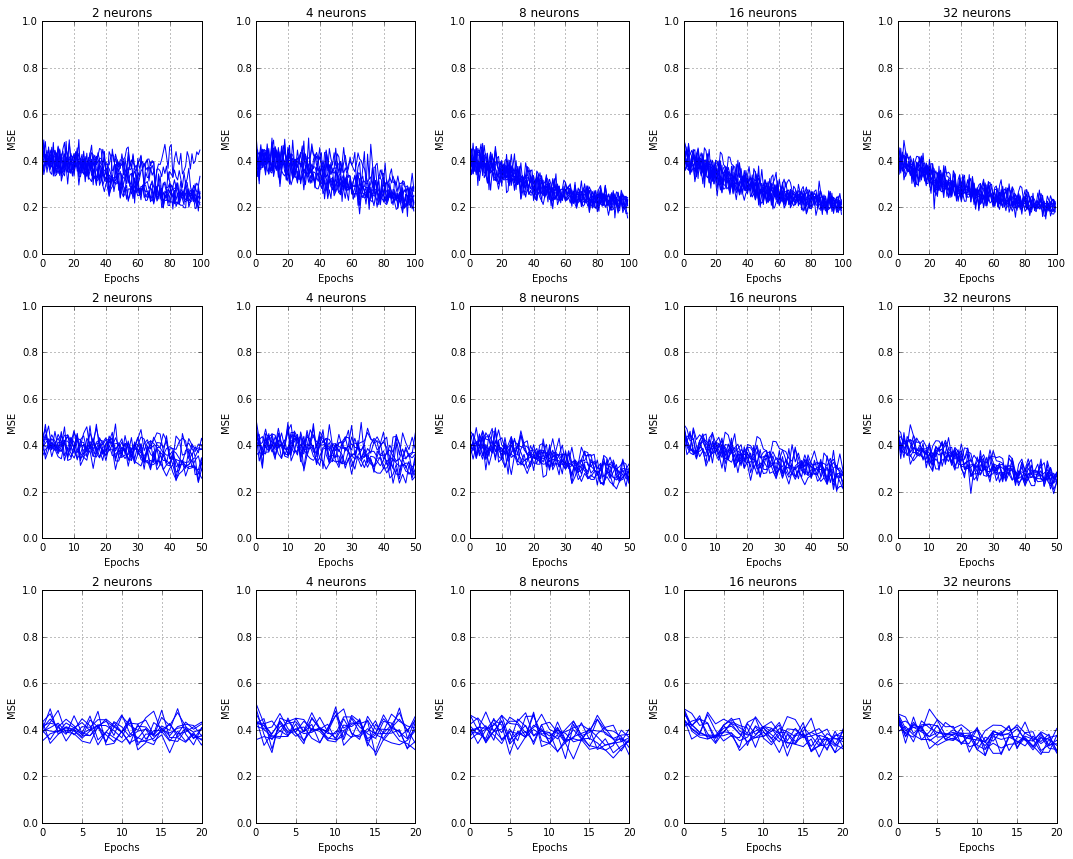

In [15]:
pl.figure(figsize=(15,12))
p_count = 0
for lim in [100, 50, 20]:
    for n in np.arange(MSE.shape[0]):
        p_count += 1
        pl.subplot(3,MSE.shape[0], p_count)
        for i in np.arange(MSE.shape[1]):
            pl.plot(MSE[n,i,:], c='b')
        pl.ylim(0,1)
        pl.xlim(0,lim)
        pl.xlabel('Epochs')
        pl.ylabel('MSE')
        pl.title(str(N_NEURONS[n]) + ' neurons')
        pl.grid()
pl.tight_layout()

## Exploring the number of hidden neurons

In [16]:
EPOCHS = [20, 50, 100]
K = 5
N_TESTS = 10
N_NEURONS = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]

In [18]:
MSE_train = np.zeros((len(N_NEURONS), len(EPOCHS), N_TESTS))
MSE_test = np.zeros((len(N_NEURONS), len(EPOCHS), N_TESTS))

for i_e, e in enumerate(EPOCHS):                                            # looping the number of epochs
    print 'Testing with', e, 'epochs...'
    for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
        print '\tTesting', h, 'neurons...'
        nn = mlp.MLP([13,h,1], 'tanh')
        for i in np.arange(N_TESTS):                                        # looping the tests
            temp1, temp2 = cv.k_fold_cross_validation(nn,
                                                      dataset,
                                                      k=K,
                                                      learning_rate=LEARNING_RATE,
                                                      momentum=MOMENTUM,
                                                      epochs=e)
            MSE_train[i_h, i_e, i] = temp1
            MSE_test[i_h, i_e, i] = temp2

Testing with 20 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...
Testing with 50 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...
Testing with 100 epochs...
	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...


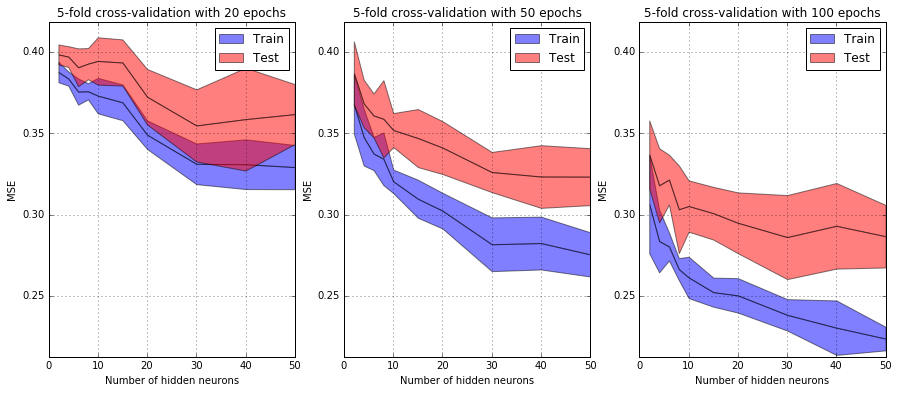

In [19]:
MSE_train_mean = np.mean(MSE_train, axis=2)
MSE_test_mean = np.mean(MSE_test, axis=2)
MSE_train_sd = np.std(MSE_train, axis=2)
MSE_test_sd = np.std(MSE_test, axis=2)

v_min = min(np.min(MSE_train_mean), np.min(MSE_test_mean))
v_max = max(np.max(MSE_train_mean), np.max(MSE_test_mean))

pl.figure(figsize=(15,6))
for i_e, e in enumerate(EPOCHS):
    pl.subplot(1,3,i_e+1)
    pl.fill_between(N_NEURONS, MSE_train_mean[:,i_e], MSE_train_mean[:,i_e]+MSE_train_sd[:,i_e], facecolor='blue', alpha=0.5, label='Train')
    pl.fill_between(N_NEURONS, MSE_train_mean[:,i_e], MSE_train_mean[:,i_e]-MSE_train_sd[:,i_e], facecolor='blue', alpha=0.5)
    pl.fill_between(N_NEURONS, MSE_test_mean[:,i_e], MSE_test_mean[:,i_e]+MSE_test_sd[:,i_e], facecolor='red', alpha=0.5, label='Test')
    pl.fill_between(N_NEURONS, MSE_test_mean[:,i_e], MSE_test_mean[:,i_e]-MSE_test_sd[:,i_e], facecolor='red', alpha=0.5)
    pl.ylim(0.95*v_min,1.05*v_max)
    pl.ylabel('MSE')
    pl.xlabel('Number of hidden neurons')
    pl.title(str(K)+'-fold cross-validation with '+str(e)+' epochs')
    pl.legend()
    pl.grid()

## Exploring the number of epochs and the number of hidden neurons at the same time

In [20]:
EPOCHS = 100

In [21]:
MSE_train = np.zeros((len(N_NEURONS), EPOCHS))
MSE_test = np.zeros((len(N_NEURONS), EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping the number of hidden neurons
    print '\tTesting', h, 'neurons...'
    nn = mlp.MLP([13,h,1], 'tanh')
    temp1, temp2 = cv.k_fold_cross_validation_per_epoch(nn,
                                                        dataset,
                                                        k=K,
                                                        learning_rate=LEARNING_RATE,
                                                        momentum=MOMENTUM,
                                                        epochs=EPOCHS)
    MSE_train[i_h, :] = temp1
    MSE_test[i_h, :] = temp2

	Testing 2 neurons...
	Testing 4 neurons...
	Testing 6 neurons...
	Testing 8 neurons...
	Testing 10 neurons...
	Testing 15 neurons...
	Testing 20 neurons...
	Testing 30 neurons...
	Testing 40 neurons...
	Testing 50 neurons...


In [22]:
min(np.min(MSE_train), np.min(MSE_test))

0.21221839638075063

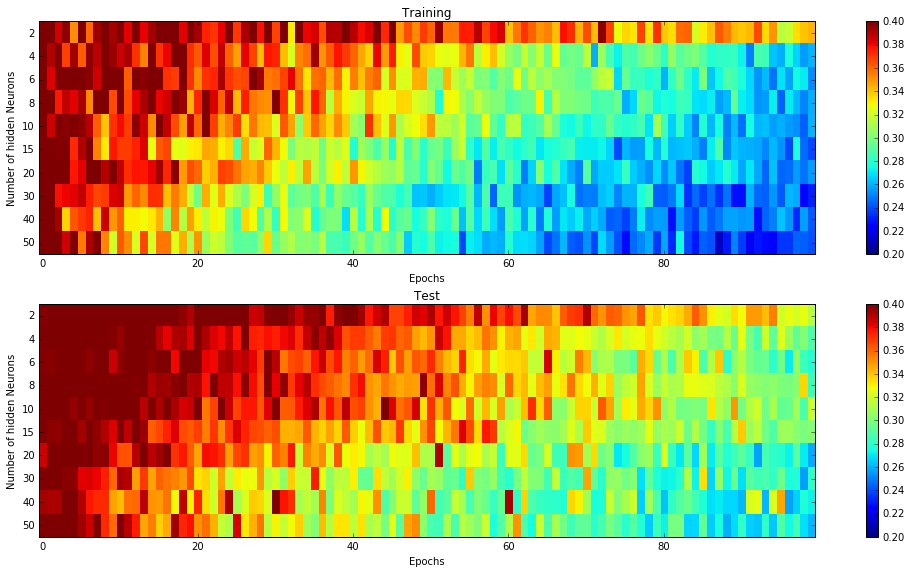

In [23]:
#v_min = min(np.min(MSE_train), np.min(MSE_test))
v_min = 0.2   # tune these values to enhance visualization
v_max = 0.4

pl.figure(figsize=(15,8))
pl.subplot(2,1,1)
pl.imshow(MSE_train, vmin=v_min, vmax=v_max, aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Training')
pl.colorbar()
pl.subplot(2,1,2)
pl.imshow(MSE_test, vmin=v_min, vmax=v_max, aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Test')
pl.colorbar()
pl.tight_layout()

## The final model

In [24]:
MSE_train, MSE_test, conf_mat = cv.k_fold_cross_validation(nn,
                                                          dataset,
                                                          k=K,
                                                          learning_rate=LEARNING_RATE,
                                                          momentum=MOMENTUM,
                                                          epochs=80,
                                                          threshold=0.0)

In [25]:
print 'MSE training: ', MSE_train
print 'MSE test: ', MSE_test
print 'Confusion matrix:'
print conf_mat

MSE training:  0.229605000409
MSE test:  0.27105254979
Confusion matrix:
[[ 31.   5.]
 [ 77.  67.]]


# 7.5

In [49]:
naturalFiles = []
synthesizedFiles = []

for f in files:
    if "n" in f:
        naturalFiles.append(wav.read(BASE_DIR + f))
    if "s" in f:
        synthesizedFiles.append(wav.read(BASE_DIR + f))

In [52]:
naturalCeps = []
for f in naturalFiles:
    naturalCeps.append(mfcc(f[1], fs=f[0])[0])

synthesizedCeps = []
for f in synthesizedFiles:
    synthesizedCeps.append(mfcc(f[1], fs=f[0])[0])

In [53]:
naturalMeanCeps = np.mean(naturalCeps[0], axis=0)
print naturalMeanCeps

[ 15.59676448   2.80003934  -0.39652586  -0.76364244  -1.25470778
   0.79151527  -0.43268339   0.10226868   0.04713486   0.31112434
   0.18058686  -0.06080008   0.17647303]


In [54]:
synthesizedMeanCeps = np.mean(synthesizedCeps[0], axis=0)
print synthesizedMeanCeps

[ 13.70235356   3.14177536  -1.31348435   2.01924182   0.64619545
  -0.31214544  -0.15833591   0.0560468    0.03908075  -0.39810772
  -0.28138121  -0.1422775   -0.01718017]


# 7.6 7yo vs 3yo

In [56]:
_3yoFiles = []
_7yoFiles = []

for f in files:
    if f.startswith("nk3"):
        _3yoFiles.append(wav.read(BASE_DIR + f))
    if f.startswith("nk7"):
        _7yoFiles.append(wav.read(BASE_DIR + f))

In [57]:
_3yoCeps = []
for f in _3yoFiles:
    _3yoCeps.append(mfcc(f[1], fs=f[0])[0])

_7yoCeps = []
for f in _7yoFiles:
    _7yoCeps.append(mfcc(f[1], fs=f[0])[0])

In [59]:
_3yoMeanCeps = np.mean(_3yoCeps[0], axis=0)
print _3yoMeanCeps

[ 16.79714949   1.54090856   0.11806946   0.75369388  -1.12860447
  -0.07059938   0.15398047   0.6023547   -0.39026959   0.66859702
   0.11442308  -0.02079662   0.25363452]


In [60]:
_7yoMeanCeps = np.mean(_7yoCeps[0], axis=0)
print _7yoMeanCeps

[  1.56494220e+01   1.81918608e+00  -6.28691171e-01  -6.50586184e-01
  -5.23806822e-01   7.55097353e-01   1.78484449e-01   3.07568984e-01
   9.78368565e-02  -2.11253999e-02   8.12625526e-02  -1.06741066e-02
   1.63699384e-01]
